In [8]:
from keras.applications import VGG16
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
conv_base = VGG16(weights='imagenet', include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 4s 0us/step


Extract feature with pretrained CNN-base

In [11]:
train_dir = '/content/drive/MyDrive/cats_and_dogs_small/train'
validation_dir = '/content/drive/MyDrive/cats_and_dogs_small/validation'
test_dir = "/content/drive/MyDrive/cats_and_dogs_small/test"

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_fratures(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) *batch_size] = features_batch
        labels[i * batch_size : (i + 1) *batch_size] = labels_batch
        i += 1
        print(i, end=' ')
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_fratures(train_dir, 2000)
validation_features, validation_labels = extract_fratures(validation_dir, 1000)
test_features, test_labels = extract_fratures(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step
100 Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 20ms/step
50 Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 19ms/step
50 

Flatten the data

In [12]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

Construct Classifier

In [13]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim= 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy',
              metrics = ['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30, batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 4s 9ms/step - loss: 0.7158 - acc: 0.7385 - val_loss: 0.2732 - val_acc: 0.8900
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3649 - acc: 0.8490 - val_loss: 0.2638 - val_acc: 0.8900
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2722 - acc: 0.8850 - val_loss: 0.5259 - val_acc: 0.8060
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2442 - acc: 0.9025 - val_loss: 0.3030 - val_acc: 0.8840
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2086 - acc: 0.9140 - val_loss: 0.2737 - val_acc: 0.8960
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.1863 - acc: 0.9255 - val_loss: 0.2644 - val_acc: 0.8990
Epoch 7/30
100/100 [==============================] - 1s 5ms/step - loss: 0.1636 - acc: 0.9365 - val_loss: 0.2986 - val_acc: 0.8970
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

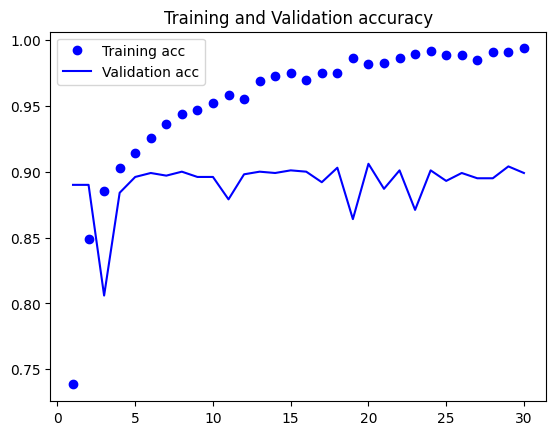

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

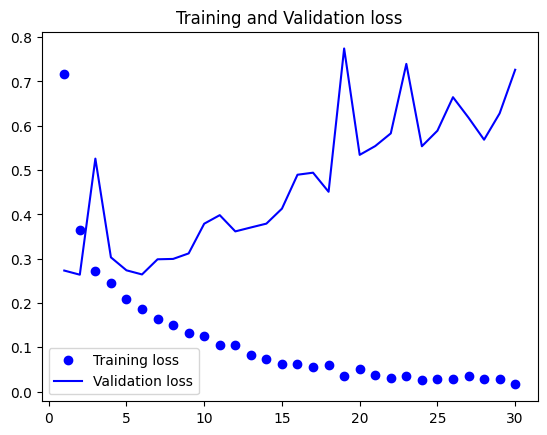

In [16]:
plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()